In [1]:
import pickle
import torch
import numpy as np

In [2]:
import os
import PIL.Image

In [31]:
MODEL_PKL_PATH = os.path.join("/home", "jeremystewart", "Desktop", 'ha-models', 'ha-models-3')

In [32]:
ld = os.listdir(MODEL_PKL_PATH)
ld.sort()
MODEL_PKL_PATH = os.path.join(MODEL_PKL_PATH, ld[-1])
print(MODEL_PKL_PATH)

/home/jeremystewart/Desktop/ha-models/ha-models-3/network-snapshot-000880.pkl


In [33]:
with open(MODEL_PKL_PATH, 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

In [34]:
z = torch.randn([1, G.z_dim]).cuda()
c = None

In [35]:
def renderImage(img_from_model):
    img_from_model = (img_from_model.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    return PIL.Image.fromarray(img_from_model[0].cpu().numpy(), 'RGB')

In [36]:
for name, param in G.named_parameters():
    if 'weight' in name and 'affine' not in name:
        print(name)

synthesis.input.weight
synthesis.L0_36_1024.weight
synthesis.L1_36_1024.weight
synthesis.L2_52_1024.weight
synthesis.L3_52_1024.weight
synthesis.L4_84_1024.weight
synthesis.L5_148_1024.weight
synthesis.L6_148_1024.weight
synthesis.L7_276_645.weight
synthesis.L8_276_406.weight
synthesis.L9_532_256.weight
synthesis.L10_1044_161.weight
synthesis.L11_1044_102.weight
synthesis.L12_1044_64.weight
synthesis.L13_1024_64.weight
synthesis.L14_1024_3.weight
mapping.fc0.weight
mapping.fc1.weight


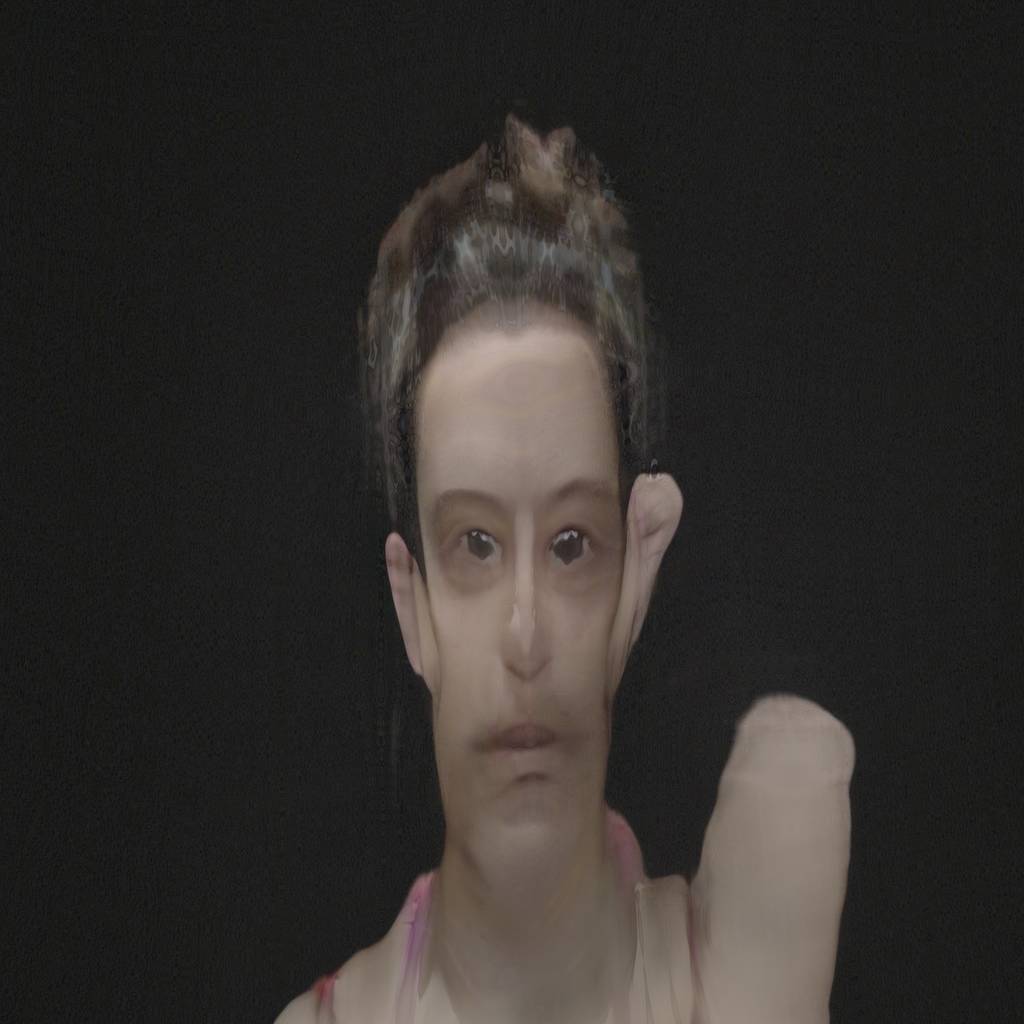

In [37]:
img = G(z, c)
renderImage(img)

1612


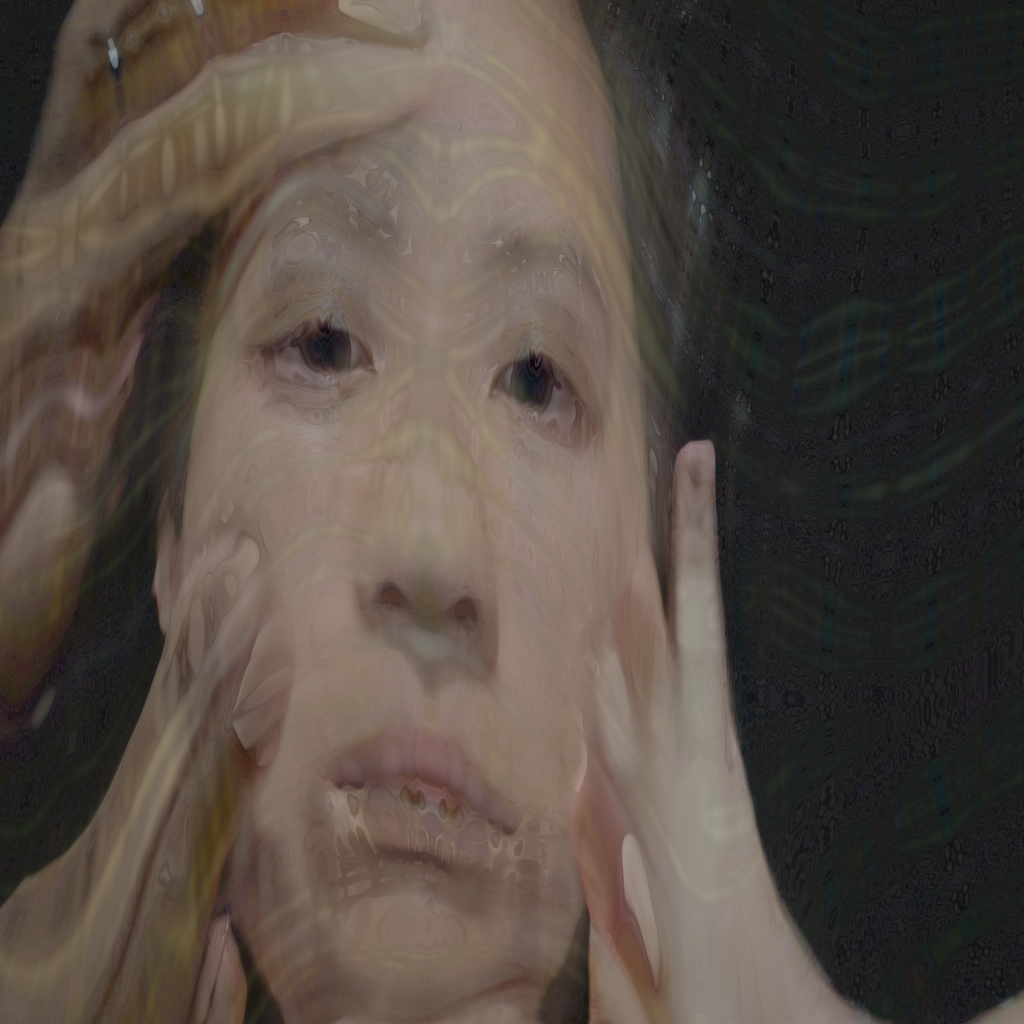

In [12]:
thresh = 0.1
w = np.random.rand(102, 161, 1, 1)
print(np.count_nonzero(w < thresh))
G.synthesis.L11_1044_102.weight *= torch.tensor((w >= thresh).astype(float)).cuda()
img = G(z, c)
renderImage(img)

330049


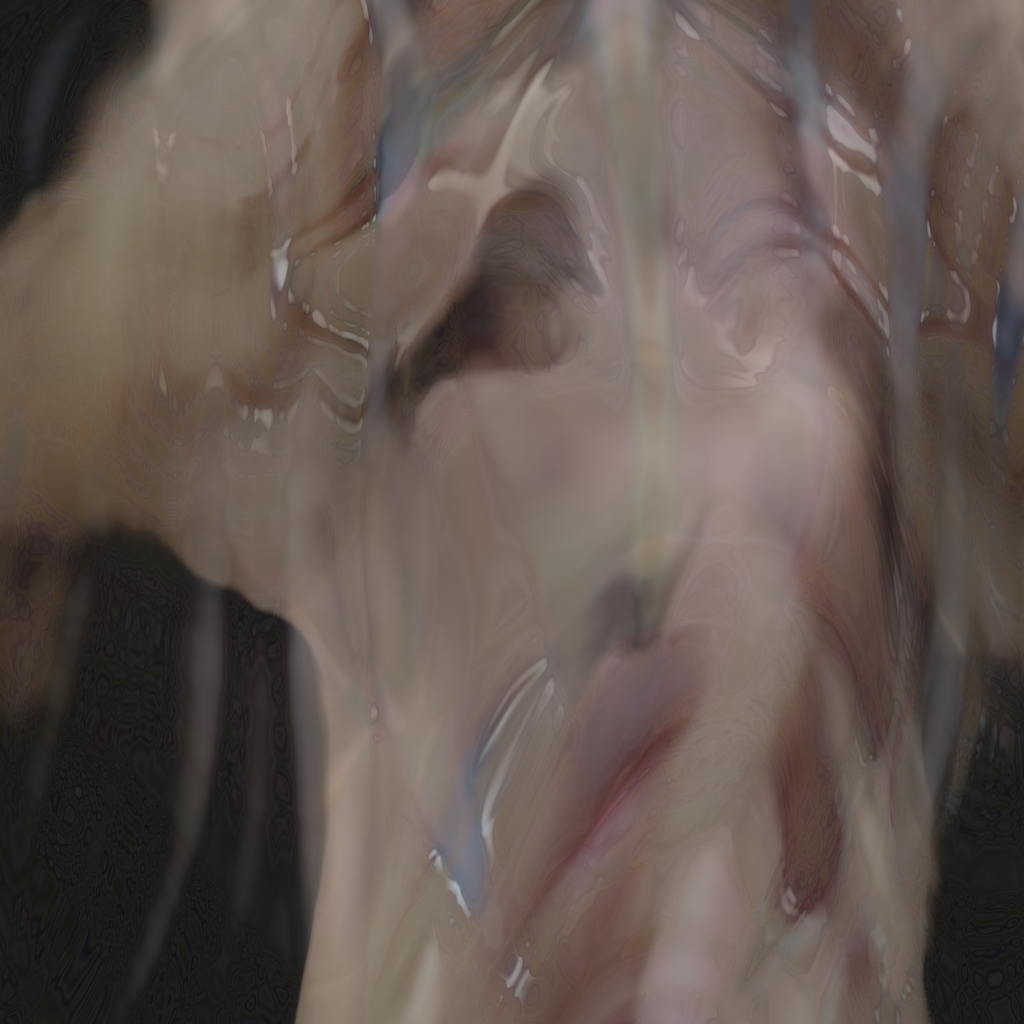

In [179]:

w = tuple(G.synthesis.L7_276_645.weight.shape)
w = np.random.rand(w[0], w[1], w[2], w[3])
thresh = 0.5
print(np.count_nonzero(w < thresh))
G.synthesis.L7_276_645.weight *= torch.Tensor((w >= thresh).astype(float)).cuda()
img = G(z, c)
renderImage(img)

524526


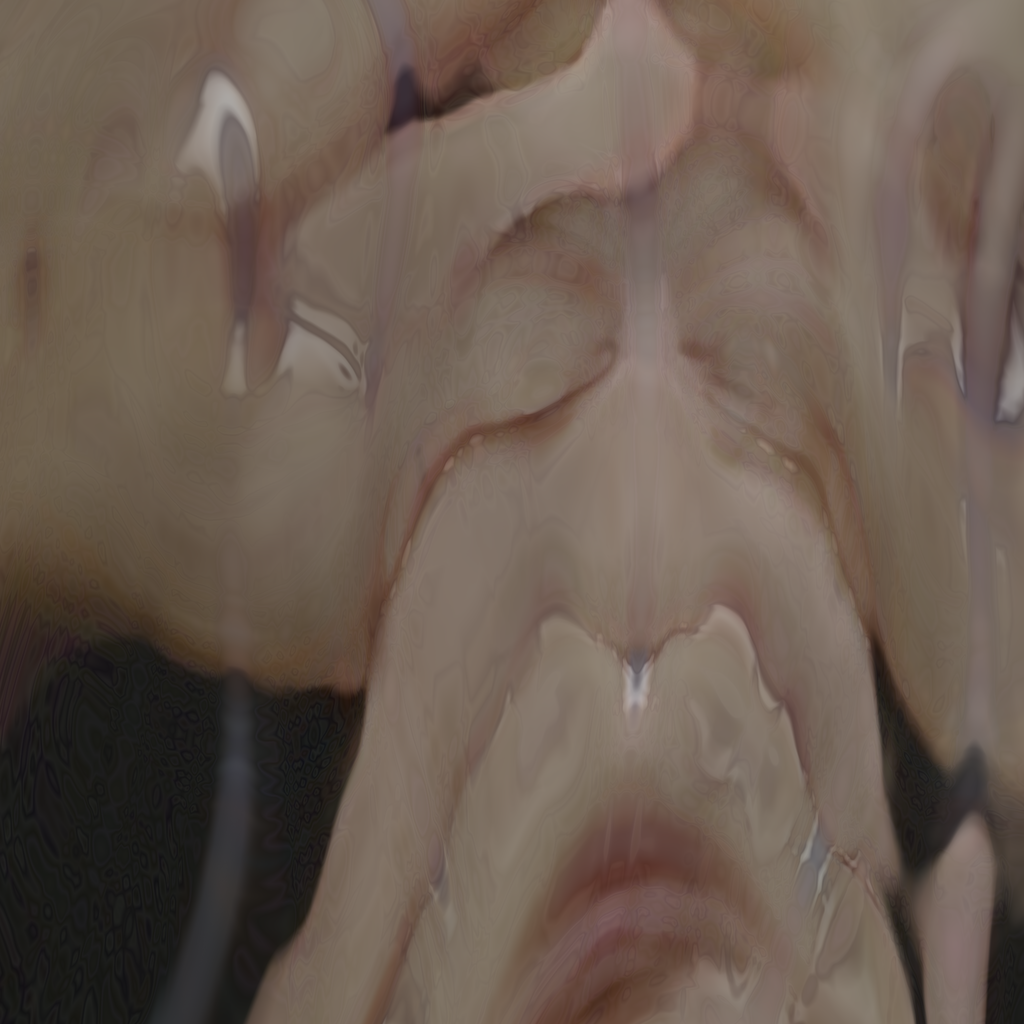

In [185]:
w = tuple(G.synthesis.L3_52_1024.weight.shape)
w = np.random.rand(w[0], w[1], w[2], w[3])
thresh = 0.5
print(np.count_nonzero(w < thresh))
G.synthesis.L3_52_1024.weight *= torch.Tensor((w >= thresh).astype(float)).cuda()
img = G(z, c)
renderImage(img)

In [17]:
sd = G.state_dict()

In [22]:
def getLayerNames(model):
    all_layer_names = []
    sd = model.state_dict()
    for key, value in sd.items():
        all_layer_names.append(key)

    return all_layer_names

In [23]:
getLayerNames(G)

['synthesis.input.weight',
 'synthesis.input.transform',
 'synthesis.input.freqs',
 'synthesis.input.phases',
 'synthesis.input.affine.weight',
 'synthesis.input.affine.bias',
 'synthesis.L0_36_1024.weight',
 'synthesis.L0_36_1024.bias',
 'synthesis.L0_36_1024.magnitude_ema',
 'synthesis.L0_36_1024.up_filter',
 'synthesis.L0_36_1024.down_filter',
 'synthesis.L0_36_1024.affine.weight',
 'synthesis.L0_36_1024.affine.bias',
 'synthesis.L1_36_1024.weight',
 'synthesis.L1_36_1024.bias',
 'synthesis.L1_36_1024.magnitude_ema',
 'synthesis.L1_36_1024.up_filter',
 'synthesis.L1_36_1024.down_filter',
 'synthesis.L1_36_1024.affine.weight',
 'synthesis.L1_36_1024.affine.bias',
 'synthesis.L2_52_1024.weight',
 'synthesis.L2_52_1024.bias',
 'synthesis.L2_52_1024.magnitude_ema',
 'synthesis.L2_52_1024.up_filter',
 'synthesis.L2_52_1024.down_filter',
 'synthesis.L2_52_1024.affine.weight',
 'synthesis.L2_52_1024.affine.bias',
 'synthesis.L3_52_1024.weight',
 'synthesis.L3_52_1024.bias',
 'synthesis.L3_

In [20]:
sd['synthesis.input.weight'].shape

torch.Size([1024, 1024])

In [21]:
for k, v in sd.items():
    print(k)

synthesis.input.weight
synthesis.input.transform
synthesis.input.freqs
synthesis.input.phases
synthesis.input.affine.weight
synthesis.input.affine.bias
synthesis.L0_36_1024.weight
synthesis.L0_36_1024.bias
synthesis.L0_36_1024.magnitude_ema
synthesis.L0_36_1024.up_filter
synthesis.L0_36_1024.down_filter
synthesis.L0_36_1024.affine.weight
synthesis.L0_36_1024.affine.bias
synthesis.L1_36_1024.weight
synthesis.L1_36_1024.bias
synthesis.L1_36_1024.magnitude_ema
synthesis.L1_36_1024.up_filter
synthesis.L1_36_1024.down_filter
synthesis.L1_36_1024.affine.weight
synthesis.L1_36_1024.affine.bias
synthesis.L2_52_1024.weight
synthesis.L2_52_1024.bias
synthesis.L2_52_1024.magnitude_ema
synthesis.L2_52_1024.up_filter
synthesis.L2_52_1024.down_filter
synthesis.L2_52_1024.affine.weight
synthesis.L2_52_1024.affine.bias
synthesis.L3_52_1024.weight
synthesis.L3_52_1024.bias
synthesis.L3_52_1024.magnitude_ema
synthesis.L3_52_1024.up_filter
synthesis.L3_52_1024.down_filter
synthesis.L3_52_1024.affine.weig

In [38]:
#img = G(z, c)
getattr(G, 'synthesis')

SynthesisNetwork(
  w_dim=512, num_ws=16,
  img_resolution=1024, img_channels=3,
  num_layers=14, num_critical=2,
  margin_size=10, num_fp16_res=4
  (input): SynthesisInput(
    w_dim=512, channels=1024, size=[36, 36],
    sampling_rate=16, bandwidth=2
    (affine): FullyConnectedLayer(in_features=512, out_features=4, activation=linear)
  )
  (L0_36_1024): SynthesisLayer(
    w_dim=512, is_torgb=False,
    is_critically_sampled=False, use_fp16=False,
    in_sampling_rate=16, out_sampling_rate=16,
    in_cutoff=2, out_cutoff=2,
    in_half_width=6, out_half_width=6,
    in_size=[36, 36], out_size=[36, 36],
    in_channels=1024, out_channels=1024
    (affine): FullyConnectedLayer(in_features=512, out_features=1024, activation=linear)
  )
  (L1_36_1024): SynthesisLayer(
    w_dim=512, is_torgb=False,
    is_critically_sampled=False, use_fp16=False,
    in_sampling_rate=16, out_sampling_rate=16,
    in_cutoff=2, out_cutoff=3.1748,
    in_half_width=6, out_half_width=4.8252,
    in_size=[36

In [54]:
ws = G.mapping(z, c, truncation_psi=1, truncation_cutoff=None, update_emas=False)
ws = ws.to(torch.float32).unbind(dim=1)
x = G.synthesis.input(ws[0])

In [55]:
for name, w in zip(G.synthesis.layer_names, ws[1:]):
    print(name)
    if 'L8' in name:
        break
    x = getattr(G.synthesis, name)(x, w)
x = x.to(torch.float32)

L0_36_1024
L1_36_1024
L2_52_1024
L3_52_1024
L4_84_1024
L5_148_1024
L6_148_1024
L7_276_645
L8_276_406


In [60]:
G.synthesis.layer_names

['L0_36_1024',
 'L1_36_1024',
 'L2_52_1024',
 'L3_52_1024',
 'L4_84_1024',
 'L5_148_1024',
 'L6_148_1024',
 'L7_276_645',
 'L8_276_406',
 'L9_532_256',
 'L10_1044_161',
 'L11_1044_102',
 'L12_1044_64',
 'L13_1024_64',
 'L14_1024_3']

In [58]:
def renderImage(img_from_model, normalize: bool = False):
    img_from_model = (img_from_model.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)

    if img_from_model.shape[3] > 3:
        img_from_model = img_from_model[:,:,:,:3]

    return PIL.Image.fromarray(img_from_model[0].cpu().numpy(), 'RGB')

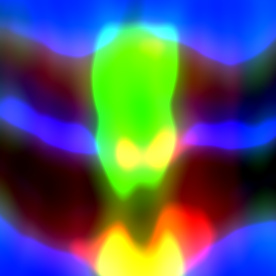

In [59]:
renderImage(x)

In [62]:
def get_seed(x, y):
    w0_seeds = []
    for ofs_x, ofs_y in [[0, 0], [1, 0], [0, 1], [1, 1]]:
        seed_x = np.floor(x) + ofs_x
        seed_y = np.floor(y) + ofs_y
        seed = (int(seed_x) + int(seed_y) * 100) & ((1 << 32) - 1)
        weight = (1 - abs(x - seed_x)) * (1 - abs(y - seed_y))
        if weight > 0:
            w0_seeds.append([seed, weight])
    return w0_seeds

In [64]:
get_seed(1.0,18.29134)

[[1801, 0.7086599999999983], [1901, 0.2913400000000017]]

In [66]:
def get_ws(model, w0_seeds):
    all_seeds = [seed for seed, _weight in w0_seeds]
    all_seeds = list(set(all_seeds))
    all_zs = np.zeros([len(all_seeds), model.z_dim], dtype=np.float32)

    for idx, seed in enumerate(all_seeds):
        rnd = np.random.RandomState(seed)
        all_zs[idx] = rnd.randn(model.z_dim)
    w_avg = model.mapping.w_avg
    all_zs = torch.from_numpy(all_zs).to('cuda')

    all_ws = model.mapping(z=all_zs, c=None, truncation_psi=1.0, truncation_cutoff=0) - w_avg
    all_ws = dict(zip(all_seeds, all_ws))

    w = torch.stack([all_ws[seed] * weight for seed, weight in w0_seeds]).sum(dim=0, keepdim=True)
    w += w_avg
    return w

In [68]:
get_ws(G, get_seed(1.0, 18.29134)).shape

torch.Size([1, 16, 512])

In [70]:
o = G.synthesis(get_ws(G, get_seed(1.0, 18.29134)))

In [71]:
o.shape

torch.Size([1, 3, 1024, 1024])

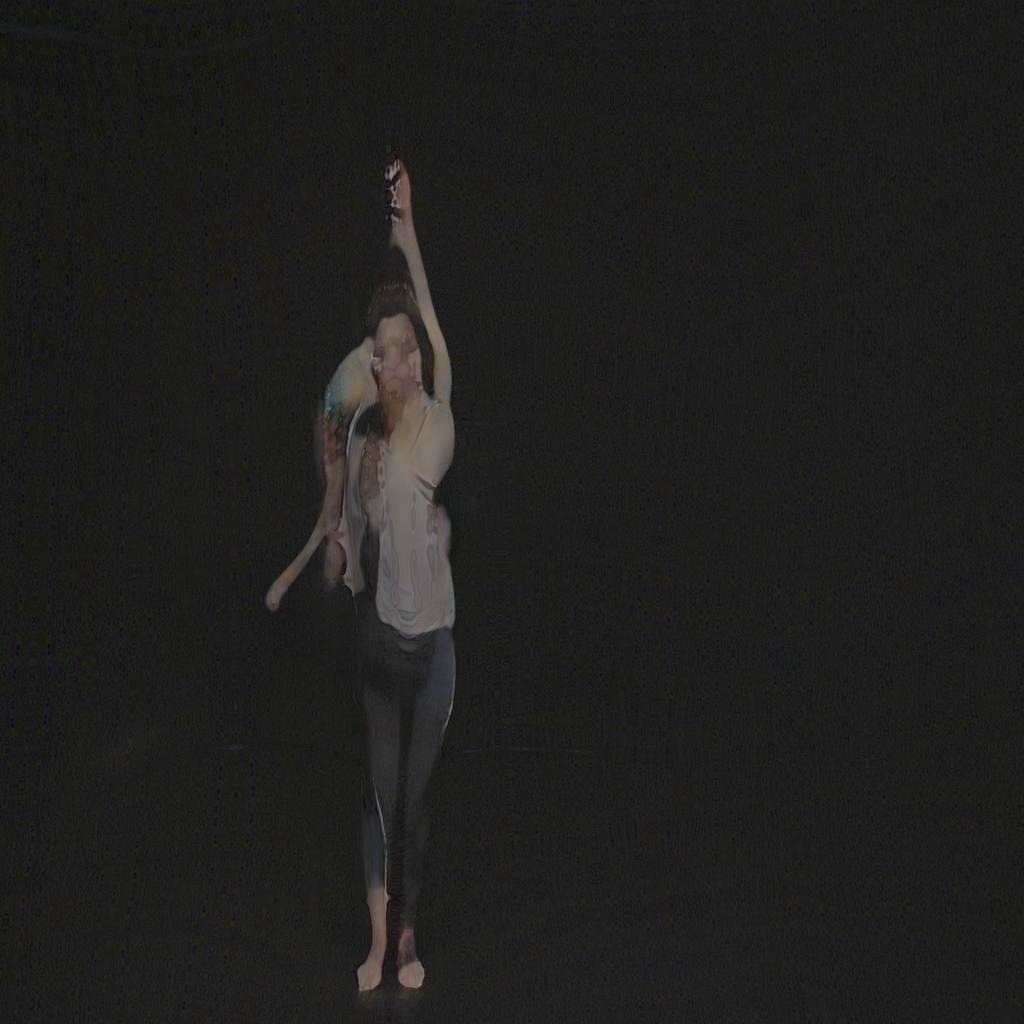

In [72]:
renderImage(o)